#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 8
### Due: Monday, Mar 28th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on March 28th.

---

## Problem 1

**Phased LINEAR light curves**


Using the code snipplet below, load LINEAR light curves.


Extend the code to:

a) plot the light curves

b) compute the best period using a Fourier transformation

c) plot the phased data and best-fit curves.

d) Solve the problem by using Lomb-Scargle Periodograms.


In [42]:

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit, lomb_scargle_BIC, lomb_scargle_bootstrap
from astroML.datasets import fetch_LINEAR_sample
from astroML.fourier import FT_continuous

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
import matplotlib
matplotlib.rc('_internal', classic_mode=True)

#------------------------------------------------------------
# Load the dataset
data = fetch_LINEAR_sample()
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]


#------------------------------------------------------------
# Compute the best frequencies
@pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}   
    for i in ids:
        t, y, dy = data[i].T
        print(" - computing power for {0} ({1} points)".format(i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

        return results

results = compute_best_frequencies(ids, n_eval=10000, n_retry=5)


@pickle_results: using precomputed results from 'LINEAR_LS.pkl'


### Solution

## Plot data

14752041


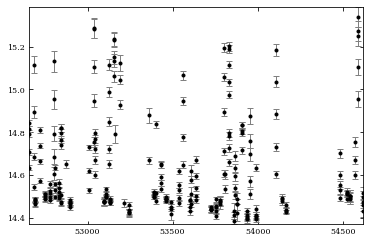

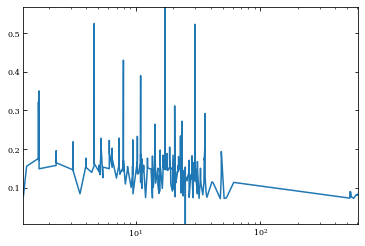

1009459


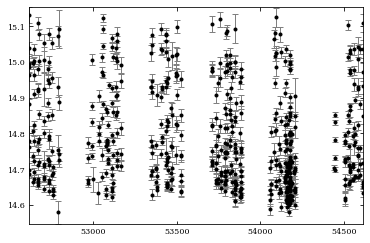

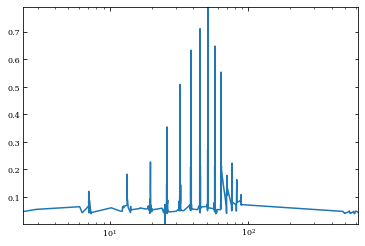

10022663


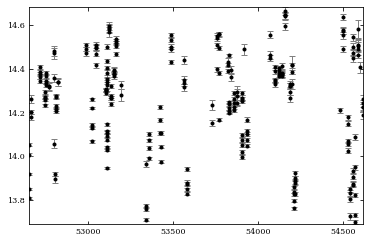

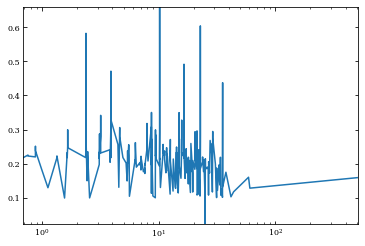

10025796


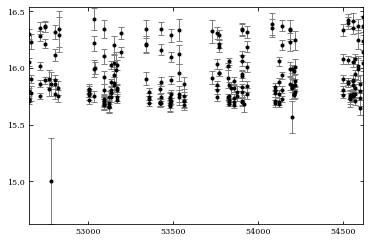

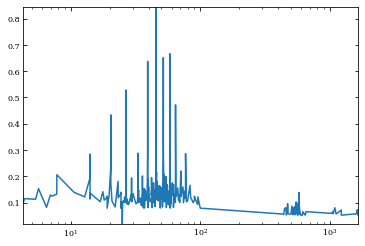

11375941


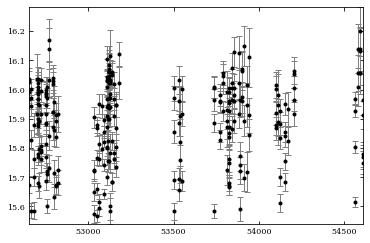

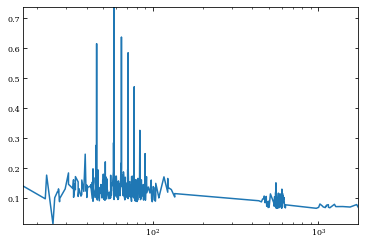

18525697


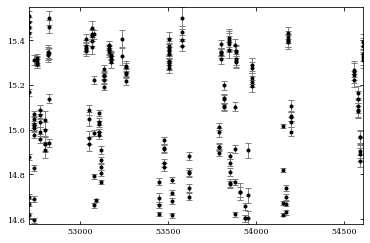

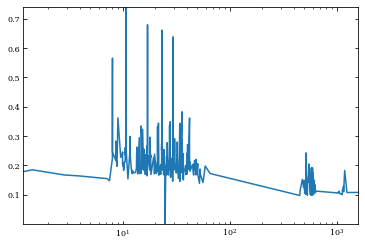

In [46]:
for i in ids:
    print(i)
    t, y, dy = data[i].T
    plt.errorbar(t, y, yerr=dy,  fmt='.k', lw=1, ecolor='gray')
    plt.show()
    plt.plot(results[i][0], results[i][1])
    plt.xscale('log')
    plt.show()

## Fourier

14752041


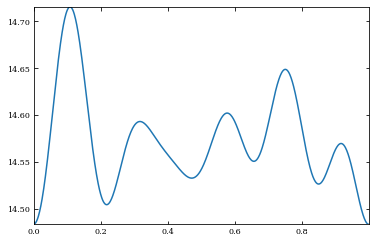

1009459


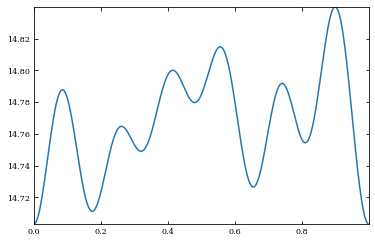

10022663


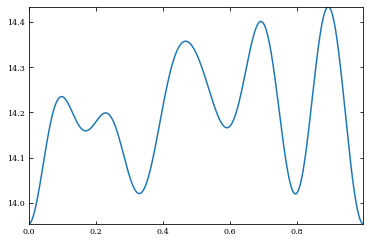

10025796


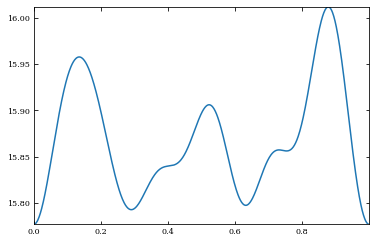

11375941


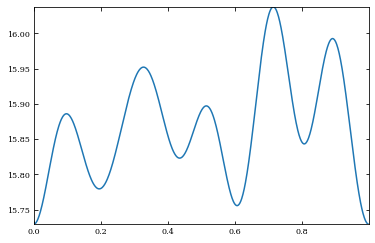

18525697


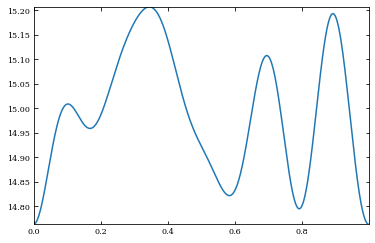

In [47]:
n_terms = 6
for i in ids:
    print(i)
    t, y, dy = data[i].T
    omega, power = results[i]
    four_fit = MultiTermFit(8, n_terms).fit(t, y, dy)
    phase, yfit = four_fit.predict(omega.size)
    
    plt.plot(phase, yfit)
    plt.show()
    

## Lomb-Scargle Periodograms

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


14752041


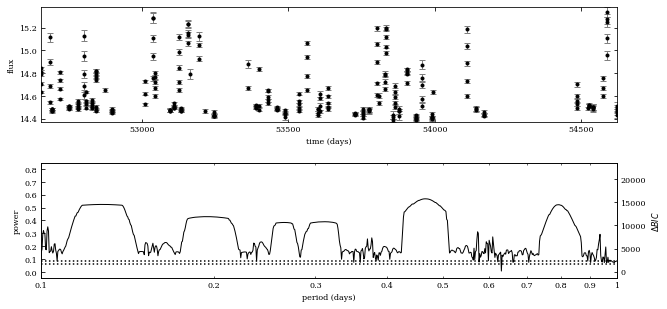

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


1009459


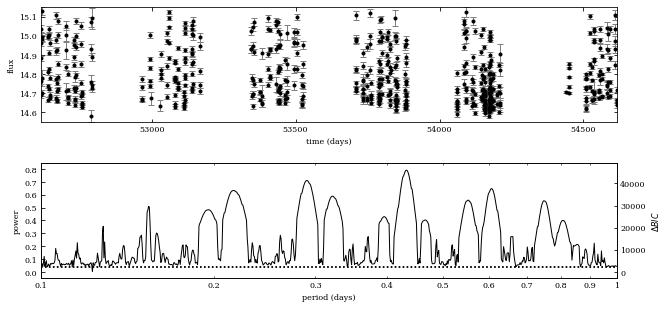

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


10022663


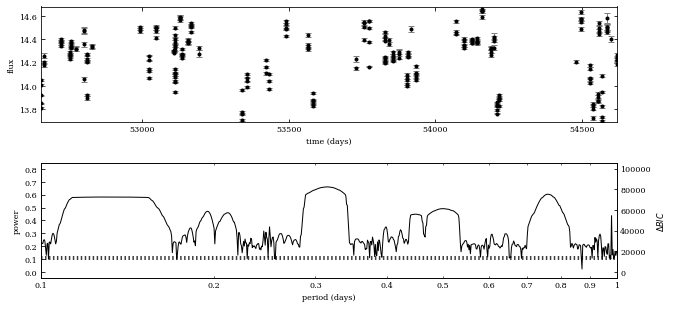

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


10025796


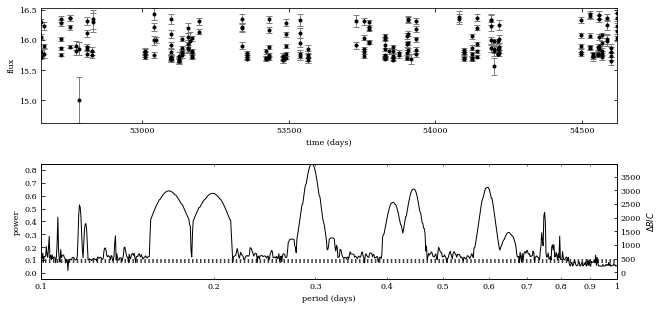

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


11375941


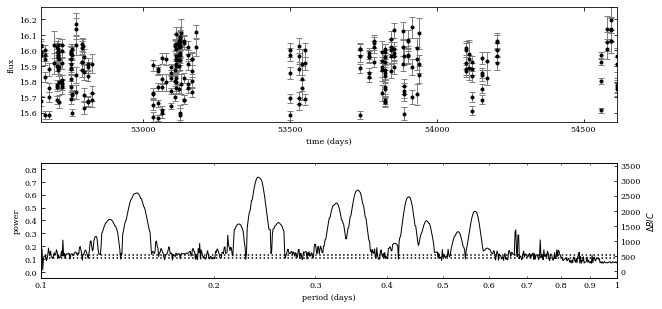

        Use astropy.stats.LombScargle instead. [warnings]
        Use astropy.stats.LombScargle.false_alarm_probability instead. [warnings]
        Use astropy.stats.LombScargle instead. [astroML.time_series.periodogram]


18525697


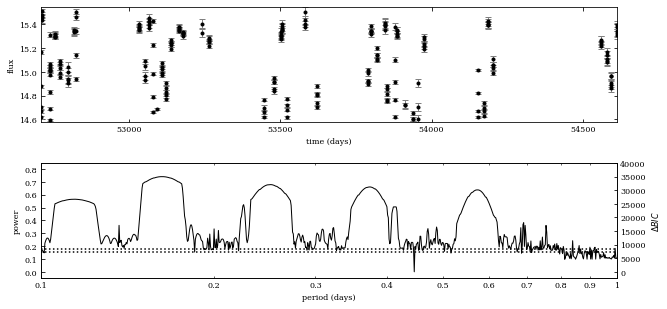

In [16]:
period = 10 ** np.linspace(-1, 0, 801)
for i in ids:
    t, y_obs, dy = data[i].T
    omega, power = results[i]

    PS = lomb_scargle(t, y_obs, dy, 
                          omega, generalized=True)

    #------------------------------------------------------------
    # Get significance via bootstrap
    D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True, 
                               N_bootstraps=1000, random_state=0)
    #Need to switch to this in the future
    #D = LombScargle(t, y_obs, dy, omega, generalized=True, 
    #                N_bootstraps=1000, random_state=0)
    sig1, sig5 = np.percentile(D, [99, 99.9])

    #------------------------------------------------------------
    print(i)
    # Plot the results
    fig = plt.figure(figsize=(10, 5))
    fig.subplots_adjust(left=0.1, right=0.9, hspace=0.35)

    # First panel: the data
    ax = fig.add_subplot(211)
    ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
    ax.set_xlabel('time (days)')
    ax.set_ylabel('flux')

    # Second panel: the periodogram & significance levels
    ax1 = fig.add_subplot(212, xscale='log')
    ax1.plot(period, PS, '-', 
             c='black', lw=1, zorder=1)
    ax1.plot([period[0], period[-1]], 
             [sig1, sig1], ':', c='black')
    ax1.plot([period[0], period[-1]], 
             [sig5, sig5], ':', c='black')


    ax1.set_xlim(period[0], period[-1])
    ax1.set_ylim(-0.05, 0.85)

    ax1.set_xlabel(r'period (days)')
    ax1.set_ylabel('power')

    # Twin axis: label BIC on the right side
    ax2 = ax1.twinx()
    ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
    ax2.set_ylabel(r'$\Delta BIC$')

    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
    ax1.xaxis.set_major_locator(plt.LogLocator(10))
    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

    plt.show()